In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
data_folder1 = "../traces/puf0_avg100/all/"
data_folder2 = "../traces/puf12_avg100/all/"

ATTACK_PT = 88
input_size = 150

In [3]:
def load_traces(data_folder, n_traces):
    traces = np.load(data_folder+'trace.npy')
    labels = np.load(data_folder+'label.npy')

    for i in range(1, n_traces):  
        tempTrace = np.load(data_folder+'trace'+str(i)+'.npy')
        tempLabel = np.load(data_folder+'label'+str(i)+'.npy')

        traces = np.append(traces,tempTrace,axis=0)
        labels = np.append(labels,tempLabel,axis=0)

    print(traces.shape)
    print(labels.shape)
    return traces, labels

In [10]:
def plot(traces, labels):
    classes = np.unique(labels)
    plt.figure(figsize=(10,10))
    average = np.zeros([np.size(classes),np.size(traces,axis=1)])
    for idx, label in enumerate(classes):
        idx = np.where(labels==label)
        xlc = traces[idx, :]
        xlc = np.squeeze(xlc)
        average[label] = np.mean(xlc,axis=0)

        powers = xlc[:,ATTACK_PT]
        p_cla = np.unique(powers)
        plc = []
        for pdx, power in enumerate(p_cla):
            pdx = np.where(powers==power)
            plc.append([power, np.size(pdx)/len(xlc)*100000])

        distri = np.array(plc)
        if label==0:
            plt.plot(distri[:,0], distri[:,1], label = "res=0", color='orange', linestyle='None', marker='^')
            #plt.plot(average[label][ATTACK_PT], color='red', linestyle=':', marker='^')
        else:
            plt.plot(distri[:,0], distri[:,1], label = "res=1", color='green', linestyle='None', marker='o')
            #plt.plot(average[label][ATTACK_PT], color='blue', linestyle=':', marker='o')

    plt.legend(loc='upper left')
    plt.savefig('distribution_%i.pdf'%ATTACK_PT)
    plt.show()

In [5]:
def main(folder, n):
    traces, labels = load_traces(folder, n)
    plot(traces, labels)

(100000, 150)
(100000,)


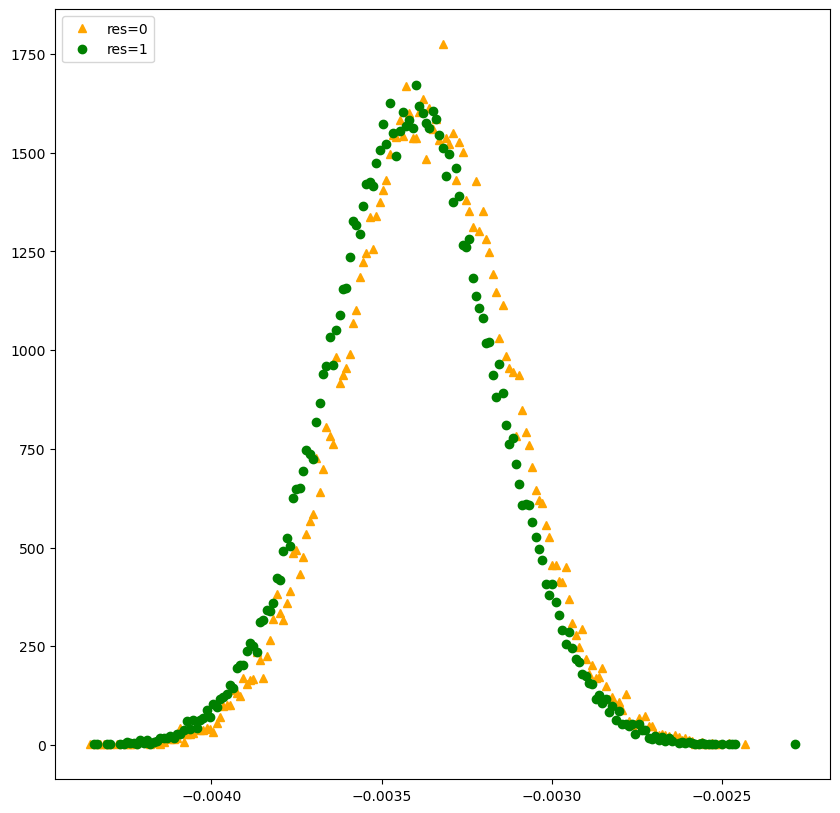

In [11]:
main(data_folder1, 10)

(50000, 150)
(50000,)


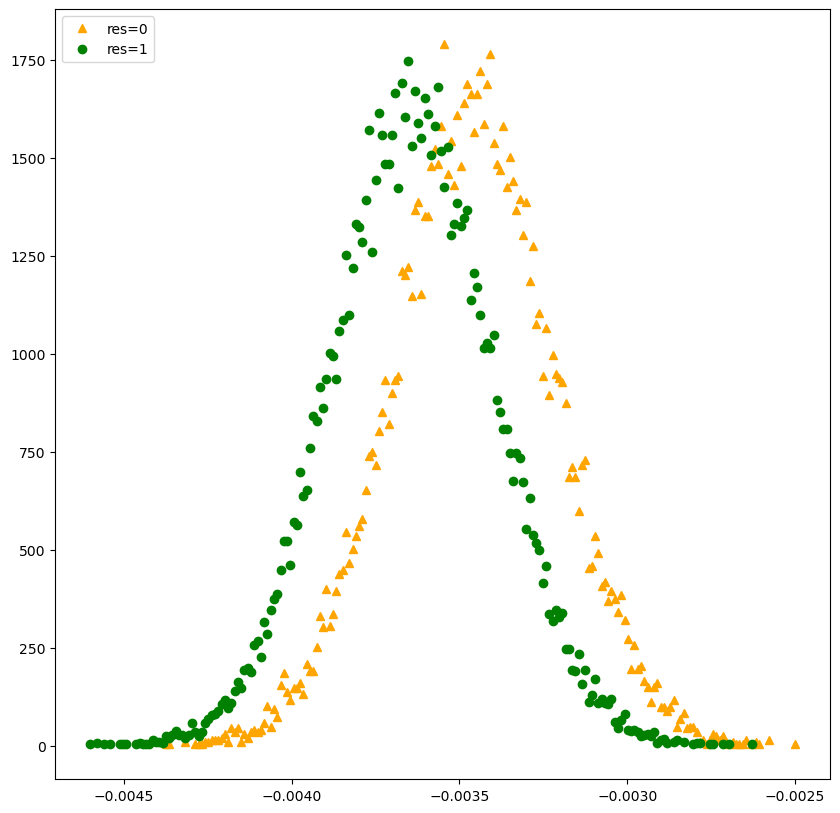

In [7]:
main(data_folder2, 5)